## Gradient Descend for a function of one variable

Consider the function of one variable $f : \mathbb{R}\rightarrow\mathbb{R}$ and a few observations:

+ The local minimum point $x^*$ of a function is the point with derivative $f'(x^*) = 0$. Furthermore, in its neighborhood, the derivatives of points to the left of $x^*$ are non-positive, the derivatives of points to the right of $x^*$ are non-negative.
+ The line tangent to the graph of that function at any point has a slope equal to the derivative of the function at that point.

Suppose $x_t$ is the point found after the $t^{th}$ iteration. We need to find an algorithm to bring $x_t$ as close to $x^*$ as possible. There are two observations as follows:

1. If the derivative of the function at $x_t$ is positive $(f'(x_t) > 0)$ then $x_t$ is to the right compared to $x^*$, and vice versa. To make the next point $x_{t+1}$ closer to $x^*$, we need to move $x_t$ to the left, that is, to the negative side. In other words, we need to move **opposite to the derivative**:

$$x_{t+1} = x_t + \Delta$$

In which, $\Delta$ is a quantity with opposite sign to $f'(x_t)$.

2. The farther $x_t$ is from $x^*$ to the right, the larger $f'(x_t)$ is than $0$ (and vice versa). So, the amount of movement $\Delta$ is, most naturally, proportional to $-f'(x_t)$.

The two comments above give us a simple update

$$x_{t+1} = x_t + \eta f'(x_t)$$

In which, $\eta$ is a positive number called learning rate. The minus sign shows that we have to go against the derivative.

### Example in Python:

Considering the function

$$f(x) = x^2 + 5\sin(x)$$

We have the derivative of this function as

$$f'(x) = 2x + 5\cos(x)$$

Suppose starting from a certain point $x_0$, at the $t^{th}$ loop, we will update as follows:

$$x_{t+1} = x_t - \eta[2x_t + 5\cos(x_t)]$$

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to calculate the derivative
def grad(x):
    return 2 * x + 5 * np.cos(x)

def cost(x):
    """ 
    To calculate the value of a function. 
    This function is not used in the algorithm but is often used to check whether the calculation of the derivative is correct 
    or to see if the value of the function decreases with each loop.
    """
    return x**2 + 5 * np.sin(x)

# to calculate the gradient descent
def myGD1(grad, x0, eta):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta * grad(x[-1])
        if (abs(grad(x_new)) < 1e-3):
            break
        x.append(x_new)
    return (x, it)

In [3]:
(x1, it1) = myGD1(grad, -5, .1)
(x2, it2) = myGD1(grad, 5, .1)
print(f'Solution x1 =  {x1[-1]}, cost = {cost(x1[-1])}, after {it1} iterations.')
print(f'Solution x2 =  {x2[-1]}, cost = {cost(x2[-1])}, after {it2} iterations.')

Solution x1 =  -1.1106667365268623, cost = -3.2463941936103735, after 11 iterations.
Solution x2 =  -1.1103410483948122, cost = -3.246394179661889, after 29 iterations.


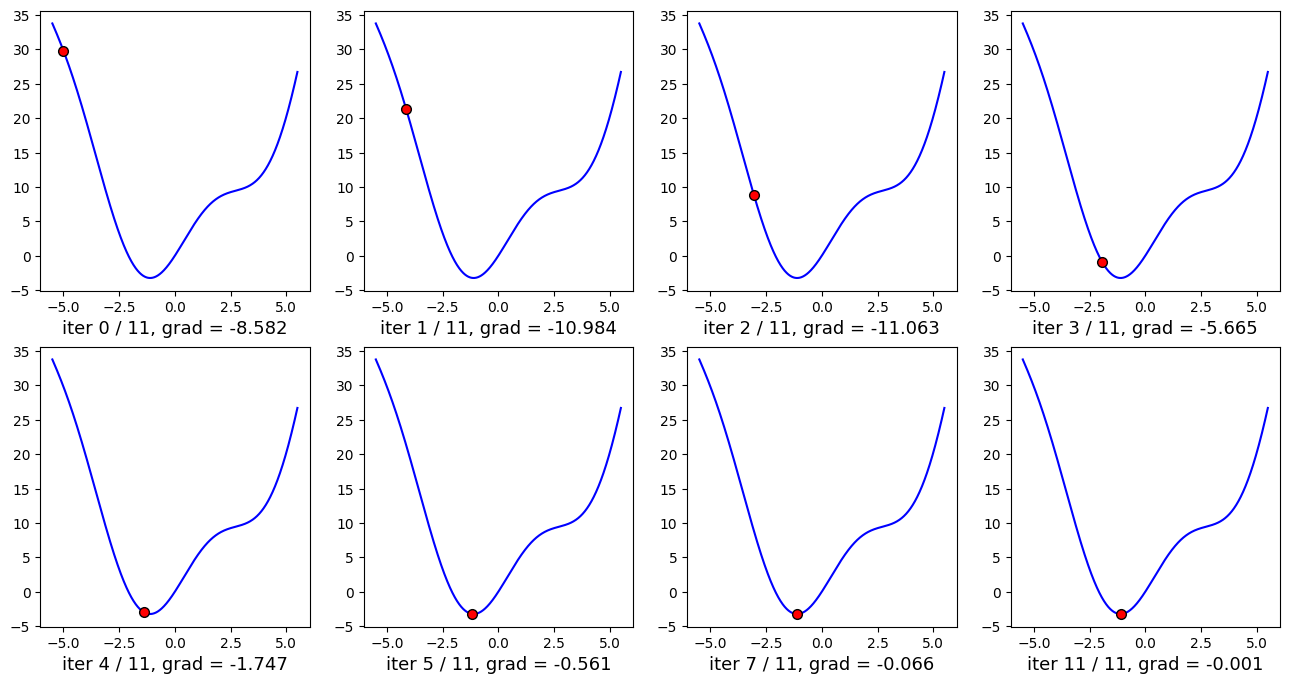

In [4]:
def draw_GD_1D(x1, ids, nrows=2, ncols=4, starts=-5.5, end=5.5):
    x0 = np.linspace(starts, end, 1000)
    y0 = cost(x0)

    fig, axs = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))

    for i, k in enumerate(ids):
        r = i // ncols
        c = i % ncols

        x = x1[k]
        y = cost(x)
        str0 = 'iter {} / {}, grad = {:.3f}'.format(ids[i], len(x1) - 1, grad(x))

        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize=13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[r, c].plot()
        else: 
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize=13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[c].plot()
    
    plt.show()

(x1, it0) = myGD1(grad, -5, .1)
# print(len(x1))
ids = [0, 1, 2, 3, 4, 5, 7, 11]
draw_GD_1D(x1, ids)

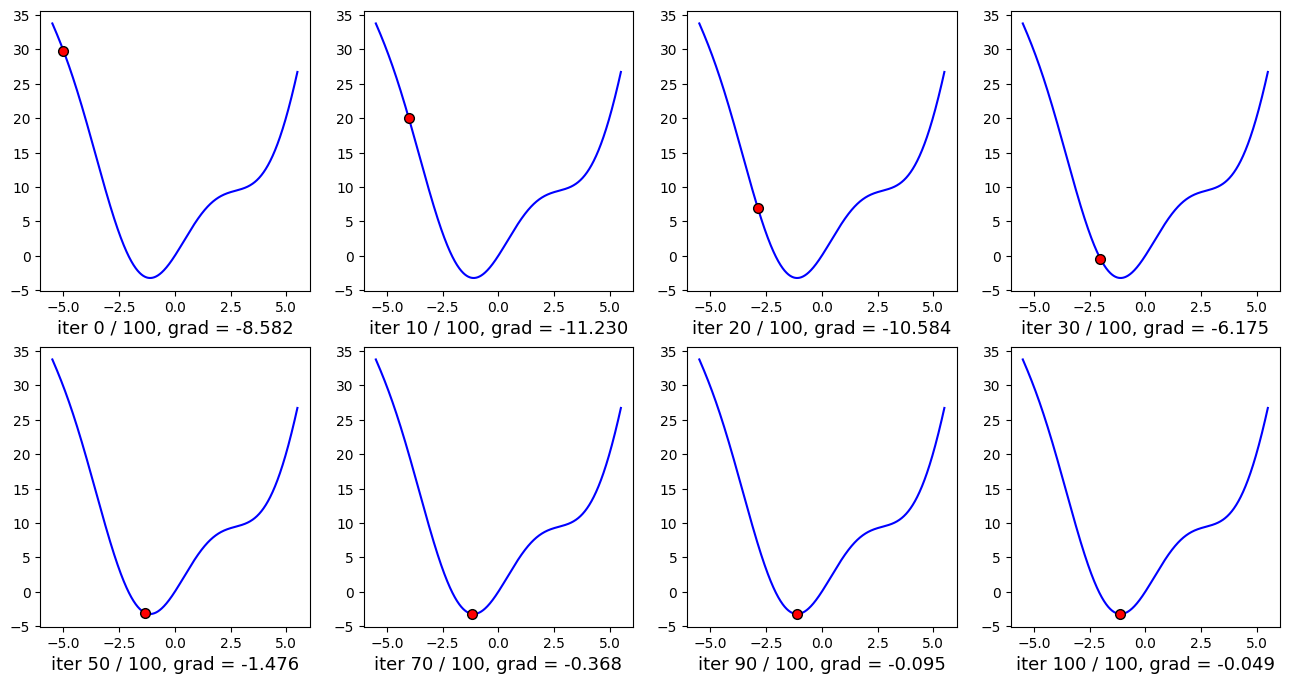

In [5]:
# small learning rate
(x1, it0) = myGD1(grad, -5, .01)
ids = [0, 10, 20, 30, 50, 70,  90, 100]
draw_GD_1D(x1, ids)

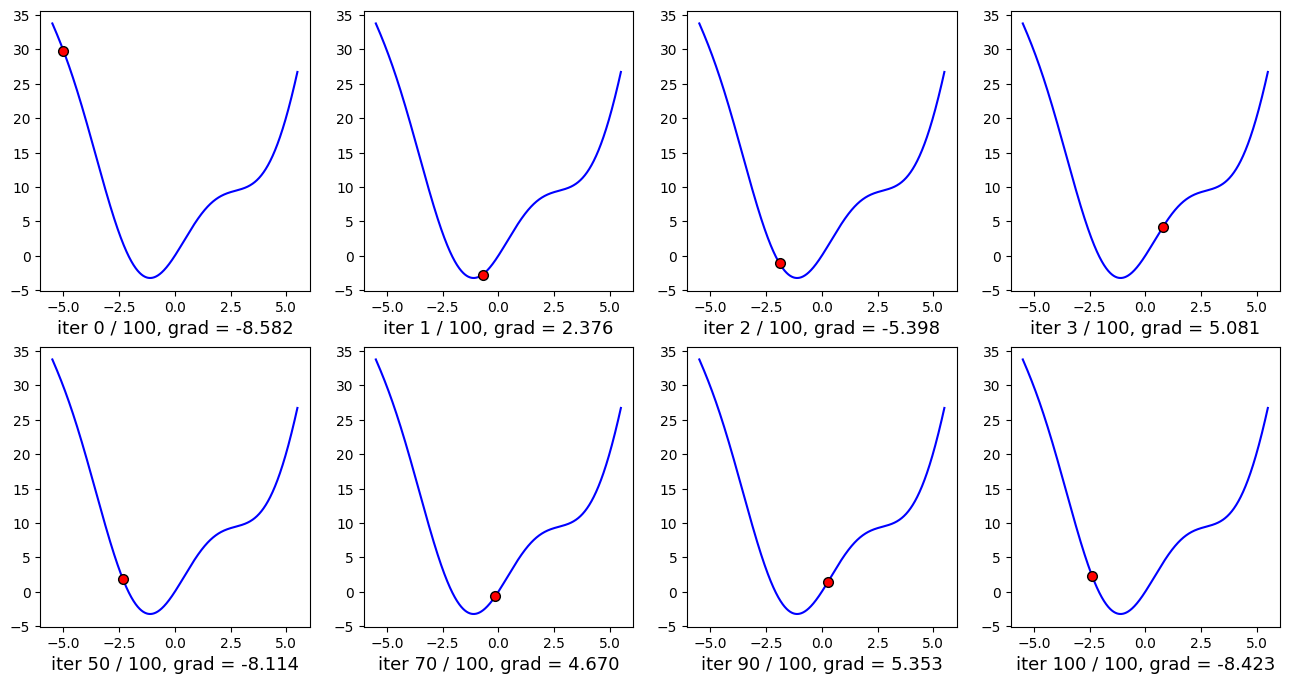

In [6]:
# large learning rate 
(x1, it0) = myGD1(grad, -5, .5)
ids = [0, 1, 2, 3, 50, 70,  90, 100]
draw_GD_1D(x1, ids)

## Gradient descend for multivariable functions

Suppose we need to find the global minimum for the function $f(\theta)$ where $\theta$ is the set of parameters to be optimized. The derivative of that function at any point $\theta$ is denoted $\nabla_{\theta}f(\theta_t)$. The GD algorithm for a multivariable function also starts with a prediction point $\theta_0$ , then, in the $t^{th}$ loop, the update rule is

$$\theta_{t+1} = \theta_t - \eta\nabla_{\theta}f(\theta_t)$$

another way to write:

$$\theta_{t+1} \leftarrow \theta_t - \eta\nabla_{\theta}f(\theta_t)$$

### GD for linear regression:

We have a cost function as

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||_2^2$$

And we have the following derivative

$$\nabla_{\textbf{w}}\mathcal{L}(\textbf{w}) = \frac{1}{N}\textbf{X}(\textbf{X}^T\textbf{w} - \textbf{y})$$

For example:

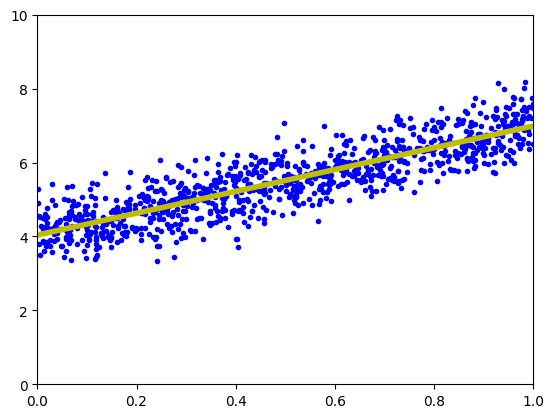

In [7]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

X = np.random.rand(1000)
y = 4 + 3 * X + .5 * np.random.randn(1000) # noise added

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

w, b = model.coef_[0][0], model.intercept_[0]

x0 = np.linspace(0, 1, 1000, endpoint=True)
y0 = w * x0 + b

plt.plot(X, y, 'b.')
plt.plot(x0, y0, 'y', linewidth=4)
plt.axis([0, 1, 0, 10])
plt.show()

In [32]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(y - Xbar.dot(w))**2

def myGD(grad, w_init, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta * grad(w[-1])
        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it)

w_init = np.array([2, 1])
(w1, it1) = myGD(grad, w_init, 0.5)
print(f'Solution found by scikit-learn: [b, w] = {[b, w]}')
print(f'Solution found by GD: [b, w] = {w1[-1]}, after {it1 + 1} iterations.')
print(np.array(w1))

Solution found by scikit-learn: [b, w] = [4.038583624662032, 2.951481168762003]
Solution found by GD: [b, w] = [4.05283046 2.92467316], after 96 iterations.
[[2.         1.        ]
 [3.50318258 1.82785965]
 [4.04949716 2.14623243]
 [4.24371049 2.2765477 ]
 [4.30850408 2.33717852]
 [4.32586681 2.37172729]
 [4.32598143 2.39626357]
 [4.31995471 2.41671821]
 [4.3118694  2.43528828]
 [4.3032221  2.45279554]
 [4.29455733 2.46955492]
 [4.28606928 2.48569429]
 [4.27782332 2.50127226]
 [4.26983762 2.51632153]
 [4.26211314 2.5308649 ]
 [4.25464471 2.54492119]
 [4.24742509 2.55850735]
 [4.24044645 2.57163935]
 [4.23370091 2.58433247]
 [4.22718074 2.59660141]
 [4.22087844 2.60846035]
 [4.21478674 2.619923  ]
 [4.2088986  2.63100261]
 [4.20320722 2.64171197]
 [4.19770603 2.65206346]
 [4.19238867 2.66206903]
 [4.18724901 2.67174025]
 [4.18228109 2.68108829]
 [4.17747918 2.69012395]
 [4.17283774 2.69885766]
 [4.1683514  2.70729953]
 [4.16401498 2.71545929]
 [4.15982347 2.72334638]
 [4.15577202 2.730

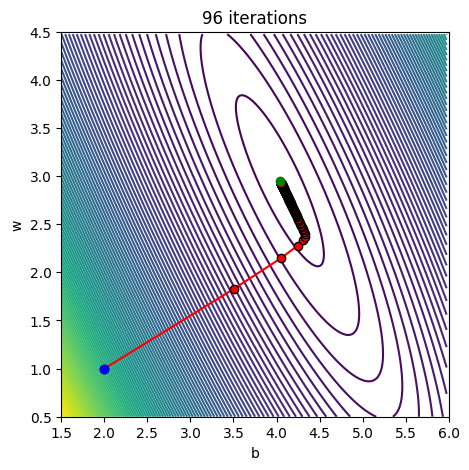

In [33]:
import matplotlib
import matplotlib.pyplot as plt

N = X.shape[0]

a1 = np.linalg.norm(y, 2)**2 / N
b1 = 2 * np.sum(X) / N
c1 = np.linalg.norm(X, 2)**2 / N
d1 = -2 * np.sum(y) / N 
e1 = -2 * X.T.dot(y) / N

delta = 0.025
xg = np.arange(1.5, 6.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 + b1 * Xg * Yg + c1 * Yg**2 + d1 * Xg + e1 * Yg

def lr_gd_draw(w1):
    w_hist = np.array(w1)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.axis([1.5, 6, 0.5, 4.5])
    CS = plt.contour(Xg, Yg, Z, 100)
    plt.plot(w_hist[:, 0], w_hist[:, 1], marker='o',color='r', linestyle='-', markeredgecolor='k')
    plt.plot(w_hist[0, 0], w_hist[0, 1], 'bo') # start point
    plt.plot(b, w, 'go') # end point
    plt.xlabel('b')
    plt.ylabel('w')
    plt.title(f'{w_hist.shape[0]} iterations')
    plt.show()

lr_gd_draw(w1)

Explain a little about the code above. Actually, this $Z$ equation is derived from the cost function of linear regression, specifically as follows:

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||_2^2 = \frac{1}{2N}\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2$$

Considering $(y_i - (\textbf{x}_i^T\textbf{w} + b))^2$ we get the following:

$$(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = y_i^2 - 2y_i\textbf{x}_i^T\textbf{w} - 2y_ib + (\textbf{x}_i^T)^2\textbf{w}^2 + 2\textbf{x}_i^T\textbf{w}b + b^2$$

And next:

$$\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = \sum_{i=1}^{N}y_i^2 - 2\textbf{w}\sum_{i=1}^{N}y_i\textbf{x}_i^T - 2b\sum_{i=1}^{N}y_i + \textbf{w}^2\sum_{i=1}^{N}(\textbf{x}_i^T)^2 + 2\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + b^2\sum_{i=1}^{N}1$$

And equals:

$$\sum_{i=1}^{N}(y_i - (\textbf{x}_i^T\textbf{w} + b))^2 = ||\textbf{y}||_2^2 - 2\textbf{w}\textbf{X}\textbf{y} - 2b\sum_{i=1}^{N}y_i + \textbf{w}^2||\textbf{X}||_2^2 + 2\textbf{w}b\sum_{i=1}^{N}\textbf{x}_i^T + Nb^2$$

In [10]:
def grad(x):
    return 2 * x + 10 * np.cos(x)

def cost(x):
    return x**2 + 10 * np.sin(x)

#check convergence
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new)) / theta_new.shape < 1e-3

def GD_momentum(grad, theta_init, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_lile(theta_init)
    for it in range(100):
        v_new = gamma * v_old + eta * grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break 
        theta.append(theta_new)
        v_old = v_new
    return theta 